# SUPERVISED ML PREDICTION

In this task, we will be predicting the percentage score for students based upon their number of hours of study.
For this, as below we will first import the dataset and then we have to perform regression analysis on its variable. By this analysis we will get an idea about the relation between the 2 variables. Then further we can run our ML model to get the predicted value. Finally, we will determine the mean difference between our actual values and predicted one. As this is a supervised learning task thus here input as well as output both are provided.

Example of supervised learnings are weather forecasting, Performance prediction of any product in a specific market, etc.

Importing all necessary liabraries

In [7]:
import pandas as pd
import numpy as np
from numpy import corrcoef
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_excel(r"F:/Dhrumil/r/TSF TASK/TASK~1.xlsx")

In [12]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(25, 2)

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


As shown below, our data have 2 columns and 25 rows. Here, as number of study hours is independent variable thus we will plot it on x-axis, while dependent variable i.e. % scores will be on y-axis.

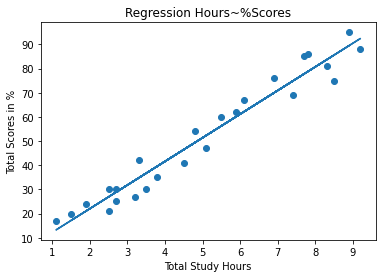

In [25]:
plt.scatter(data.Hours, data.Scores)
m, b = np.polyfit(data.Hours, data.Scores, 1)
plt.plot(data.Hours, m*data.Hours+b)
plt.xlabel("Total Study Hours")
plt.ylabel("Total Scores in %")
plt.title("Regression Hours~%Scores");

In [26]:
r, p = scipy.stats.pearsonr(data.Hours, data.Scores)
print("r= ", r)
print("p= ", p)

r=  0.9761906560220884
p=  9.132624467460325e-17


Here the value of r is very close to 1. Thus, both the variable have a positive relationship with each other. Thus, one increases when the other will increase.

As here we came to know the relation between 2 variables, hence further we will split the data into train and test part and will run our ML model i.e. Linear Regression model, on the splited data.

In [8]:
x = data.iloc[:, :-1].values  #Accessing 1st column in 2D, Hours
y = data.iloc[:, 1].values  #Accessing 2nd column in 1D, Scores

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)

In [9]:
x.shape

(25, 1)

In [10]:
y.shape

(25,)

As shown above we had split the data into train and test part in such a way that they can have the individul shape as above.

In [141]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Comparing the actual score with predicted score for given number of hours of study.

In [148]:
y_pred= model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['x_test']= x_test
df

,Actual,Predicted,x_test
0,25,29.737648,2.7
1,95,89.130733,8.9
2,30,29.737648,2.7
3,27,34.527413,3.2
4,88,92.004592,9.2


In [83]:
hours = [[9.25]]
prediction = model.predict(hours)
prediction

array([93.65556507])

For the required 9.25 hours, our model will be predicting the score of 93.65%. Now, let's check the mean error in our prediction as below.

In [96]:
def mae(y_test, y_pred):
    return np.mean(abs(y_test-y_pred))

print("Mean absolute error: ", mae(y_test, y_pred).round(2))

Mean absolute error:  6.35


Thus we can expect the mean error of 6.35% in our final prediction.

As a result one can conclude that for 9.25 hrs of study, the score can be 93.65 (+/-) 6.35 %.